In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline
import math

data = pd.read_csv('heart_2020_cleaned.csv')

In [246]:
data.shape

(319795, 18)

In [247]:
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# Analyse data

<AxesSubplot:xlabel='Sex', ylabel='count'>

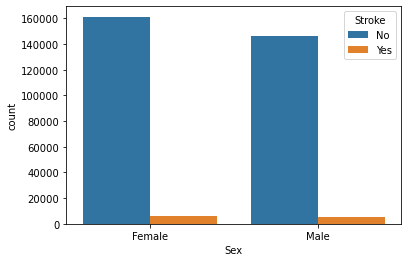

In [248]:
# check for stroke occurence in male and female
sns.countplot(x='Sex', hue='Stroke', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

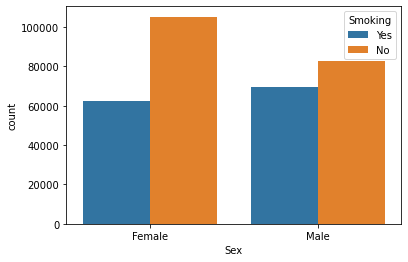

In [249]:
sns.countplot(x='Sex', hue='Smoking', data=data)

<AxesSubplot:>

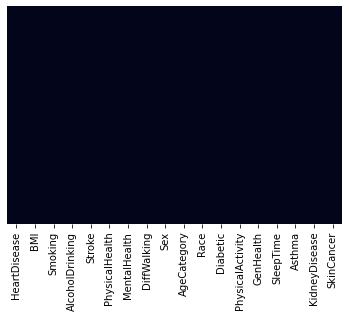

In [250]:
# visually check for null values or NaN
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

# Data Wrangling

We have to remove the string values or convert them to categorical values. This data is already cleaned but we will observe just for observation sake 

In [251]:
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [252]:
new_data = data.drop(['Diabetic', 'DiffWalking', 'Asthma', 'SkinCancer', 'Stroke', 'AgeCategory', 'Race', 'MentalHealth', 'PhysicalHealth', 'GenHealth', 'SleepTime'], axis=1, inplace=True)
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,PhysicalActivity,KidneyDisease
0,No,16.60,Yes,No,Female,Yes,No
1,No,20.34,No,No,Female,Yes,No
2,No,26.58,Yes,No,Male,Yes,No
3,No,24.21,No,No,Female,No,No
4,No,23.71,No,No,Female,Yes,No


In [253]:
Smoking = pd.get_dummies(data['Smoking'], drop_first=True)
AlcoholDrinking = pd.get_dummies(data['AlcoholDrinking'], drop_first=True)
Sex = pd.get_dummies(data['Sex'], drop_first=True)
PhysicalActivity = pd.get_dummies(data['PhysicalActivity'], drop_first=True)
KidneyDisease = pd.get_dummies(data['KidneyDisease'], drop_first=True)

In [254]:
cleaned_data = pd.concat([data['BMI'],Smoking, AlcoholDrinking, Sex, PhysicalActivity, ], axis=1)

In [255]:
cleaned_data.head(10)

,BMI,Yes,Yes,Male,Yes
0,16.60,1,0,0,1
1,20.34,0,0,0,1
2,26.58,1,0,1,1
3,24.21,0,0,0,0
4,23.71,0,0,0,1
5,28.87,1,0,0,0
6,21.63,0,0,0,1
7,31.64,1,0,0,0
8,26.45,0,0,0,0
9,40.69,0,0,1,1


In [256]:
X = cleaned_data['Male']
Y = cleaned_data.drop('Male', axis=1)

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=6)

In [259]:
from sklearn.linear_model import LogisticRegression

In [260]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.